In [35]:
!pip install opencv-python-headless

In [36]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from numpy import array
import cv2
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
import os

root='/content/gdrive/MyDrive/Colab Notebooks/Handwritten Signature Data/gray_scale'

for i in range(0,16):
  os.mkdir(os.path.join(root, f'signature_{i+1}'))

In [ ]:
# for renaming the folders and images

from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/gdrive/My Drive/Colab Notebooks/Handwritten Signature Data/data'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))  

In [ ]:
# Code for Gray scale
import os
import cv2 as cv2

import cv2
from google.colab.patches import cv2_imshow 

directory = "C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\data"


# gray_path= '/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Data_Augmentation'
gray_path= 'C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale'
def gray(directory):
  for root, dirs, files in os.walk(directory):
      for i, directory in enumerate(dirs): 
        print(i+1,directory)
        # print(gray_path,i)
        old_dir= os.path.join(root,directory)
       
        old_gray= os.path.join (gray_path,f'signature_{i+1}')
        # print(old_dir)
        print(old_gray)
        # new_dir= os.path.join(old_dir,f'signature_{i+1}')
        # print(new_dir)
        for j,file_name in enumerate((os.listdir(old_dir))):
            # print(j+1,file_name)
            # new_dir= os.path.join(old_dir,f'signature_{i+1}_{j+1}.jpg')
            # new_gray = os.path.join(old_gray,f'signature_{j+1}.jpg')
            # print(new_dir)
            # print(new_gray)
            filename= f'signature_{j+1}.jpg'
            # print(filename)
            img =  cv2.imread((os.path.join(old_dir,filename))) #image read for gray scale 
        
          
            
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            cv2.imwrite((os.path.join(old_gray,f'signature_{j+1}.jpg')),gray)
            # cv2_imshow(gray)
            # cv2.waitKey(0)
        

gray(directory)

In [4]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import Augmentor

# /content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Gray_scale

# p = Augmentor.Pipeline('/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Hand_Sign_Data')

p = Augmentor.Pipeline('C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale')  # gray image source path

In [ ]:
p.rotate(probability = 0.7,max_left_rotation=10,max_right_rotation=10)

p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)

p.rotate270(probability=0.5)

p.flip_left_right(probability=0.5)

p.flip_top_bottom(probability=0.5)

p.zoom_random(probability=0.5, percentage_area=0.8)

# p.zoom(probability=0.3,min_factor=1.1,max_factor=1.6)

p.skew_left_right(0.5,0.3)

p.skew_top_bottom(0.5,0.5)
p.resize(1,519,276)
p.random_distortion(0.5,4,6,5) #probability, grid width, height,magnitude
p.shear(1,10,11) # prob, max_shear_left, max_shear_right


In [ ]:
p.sample(1600)

In [ ]:
# To rename Augmented Data

data_dir = 'C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale\output'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

In [6]:
pip install split-folders[full]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import splitfolders
input_folder = "C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale\output"
splitfolders.ratio (input_folder, output="C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\splitted_gray_data_85_15",
                seed=42, ratio=(.85,.15),
                group_prefix=None)

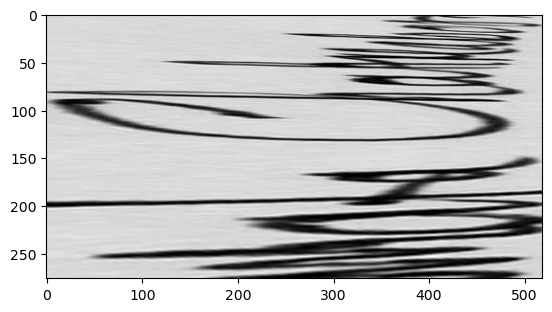

In [3]:
img = image.load_img('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_85_15//train//subject_1//signature_11.jpg')
plt.imshow(img)
# print(img.shape)

In [4]:
print(cv2.imread('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_85_15//train//subject_1//signature_11.jpg').shape)
cv2.imread('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_85_15//train//subject_1//signature_11.jpg')

(276, 519, 3)


array([[[223, 223, 223],
        [222, 222, 222],
        [222, 222, 222],
        ...,
        [ 87,  87,  87],
        [ 76,  76,  76],
        [ 67,  67,  67]],

       [[218, 218, 218],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [214, 214, 214],
        [212, 212, 212],
        [210, 210, 210]],

       [[218, 218, 218],
        [218, 218, 218],
        [217, 217, 217],
        ...,
        [222, 222, 222],
        [221, 221, 221],
        [221, 221, 221]],

       ...,

       [[212, 212, 212],
        [213, 213, 213],
        [213, 213, 213],
        ...,
        [215, 215, 215],
        [216, 216, 216],
        [216, 216, 216]],

       [[215, 215, 215],
        [215, 215, 215],
        [216, 216, 216],
        ...,
        [218, 218, 218],
        [219, 219, 219],
        [220, 220, 220]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [220, 220, 220],
        [221, 221, 221],
        [221, 221, 221]]

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
#RUN FROM HERE

batch_size=50 #20  #15

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)



In [39]:
train_generator=train_datagen.flow_from_directory('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_85_15//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

# same generator for validation data

validation_generator=test_datagen.flow_from_directory("C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_85_15//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

Found 1351 images belonging to 16 classes.
Found 249 images belonging to 16 classes.


In [40]:
num_samples = len(train_generator)
x_train = []
y_train = []
for i in range(num_samples):
    x_batch, y_batch = next(train_generator)
    x_train.append(x_batch)
    y_train.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

num_samples = len(validation_generator)
x_val = []
y_val = []
for i in range(num_samples):
    x_batch, y_batch = next(validation_generator)
    x_val.append(x_batch)
    y_val.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)


## 25 Epoch

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=25, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/25
43/43 [==============================] - 59s 801ms/step - loss: 2.7957 - accuracy: 0.0651 - val_loss: 2.7831 - val_accuracy: 0.0683
Epoch 2/25
43/43 [==============================] - 28s 653ms/step - loss: 2.7724 - accuracy: 0.0740 - val_loss: 2.7701 - val_accuracy: 0.0803
Epoch 3/25
43/43 [==============================] - 28s 655ms/step - loss: 2.7609 - accuracy: 0.0873 - val_loss: 2.7626 - val_accuracy: 0.0803
Epoch 4/25
43/43 [==============================] - 30s 705ms/step - loss: 2.7539 - accuracy: 0.0829 - val_loss: 2.7593 - val_accuracy: 0.0843
Epoch 5/25
43/43 [==============================] - 33s 767ms/step - loss: 2.7486 - accuracy: 0.0962 - val_loss: 2.7557 - val_accuracy: 0.1004
Epoch 6/25
43/43 [==============================] - 35s 808ms/step - loss: 2.7333 - accuracy: 0.0947 - val_loss: 2.7551 - val_accuracy: 0.0843
Epoch 7/25
43/43 [==============================] - 31s 721ms/step - loss: 2.7279 - accuracy: 0.1044 - val_loss: 2.7670 - val_accuracy: 0.0643

In [42]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

8/8 [==============================] - 5s 428ms/step - loss: 2.5455 - accuracy: 0.1406
Test Loss: 2.545471429824829
Test Accuracy: 0.1405622512102127
8/8 [==============================] - 56s 617ms/step


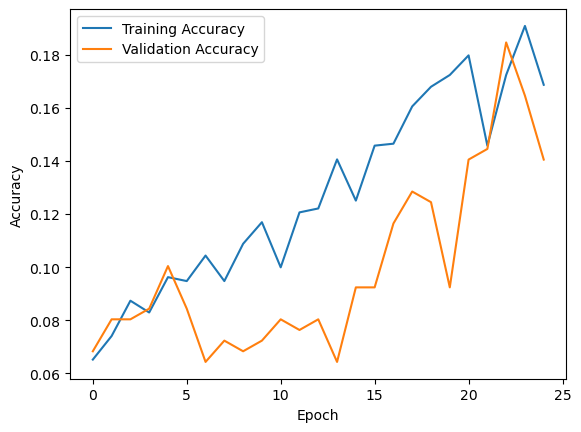

In [43]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

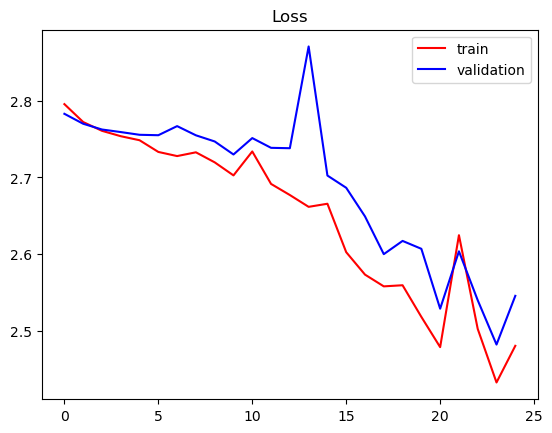

In [44]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [45]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

8/8 [==============================] - 5s 430ms/step
Confusion Matrix:
[[ 0  3  3  2  2  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  7  1  6  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  6  3  2  3  0  1  1  0  0  1  0  0  0  0  1]
 [ 0  1  0 11  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  3  1  0  4  0  0  1  3  0  0  1  0  0  0  0]
 [ 0  2  3  6  1  0  0  2  0  0  0  1  0  0  0  0]
 [ 0  2  2  0  2  0  1  0  4  0  1  0  0  0  5  0]
 [ 0  1  1 13  0  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  1  1  0  2  0  2  0  5  0  3  0  0  0  1  0]
 [ 0  1  6  4  0  0  1  0  0  0  2  0  0  0  0  0]
 [ 0  5  4  5  0  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  6  2  6  0  0  0  2  0  0  0  1  0  0  2  0]
 [ 0  3  4  0  2  0  0  2  0  0  3  0  0  0  1  0]
 [ 0  0  0 13  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  4  5  3  0  0  0  1  1  0  0  0  0  0  1  1]
 [ 0  3  3  1  0  0  0  1  3  0  2  1  0  0  2  0]]


8/8 [==============================] - 5s 506ms/step


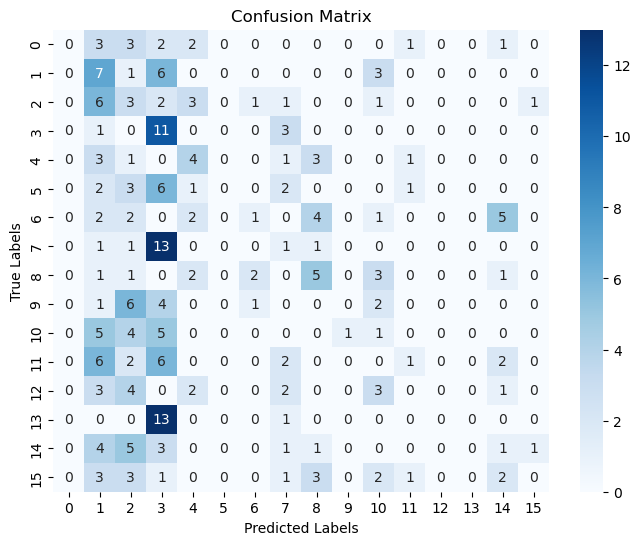

In [46]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.4118, FPR = 0.1767, TNR = 0.8233, FNR = 0.5882
Class 2: TPR = 0.1667, FPR = 0.1558, TNR = 0.8442, FNR = 0.8333
Class 3: TPR = 0.7333, FPR = 0.2607, TNR = 0.7393, FNR = 0.2667
Class 4: TPR = 0.3077, FPR = 0.0508, TNR = 0.9492, FNR = 0.6923
Class 5: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 6: TPR = 0.0588, FPR = 0.0172, TNR = 0.9828, FNR = 0.9412
Class 7: TPR = 0.0588, FPR = 0.0603, TNR = 0.9397, FNR = 0.9412
Class 8: TPR = 0.3333, FPR = 0.0513, TNR = 0.9487, FNR = 0.6667
Class 9: TPR = 0.0000, FPR = 0.0043, TNR = 0.9957, FNR = 1.0000
Class 10: TPR = 0.0625, FPR = 0.0644, TNR = 0.9356, FNR = 0.9375
Class 11: TPR = 0.0526, FPR = 0.0174, TNR = 0.9826, FNR = 0.9474
Class 12: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0625, FPR = 0.0515, TNR = 0.9485, FNR = 0.9375
Class 15: TPR = 0.0000, FPR = 0.008

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17864\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17864\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


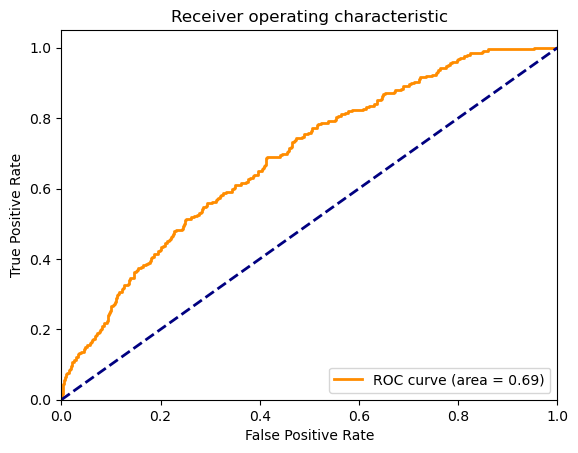

In [48]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

8/8 [==============================] - 8s 538ms/step - loss: 2.5455 - accuracy: 0.1406
Test Loss: 2.545471429824829
Test Accuracy: 0.1405622512102127
8/8 [==============================] - 5s 450ms/step
AUC for class 0: 0.5471
AUC for class 1: 0.6876
AUC for class 2: 0.5618
AUC for class 3: 0.8815
AUC for class 4: 0.7070
AUC for class 5: 0.6781
AUC for class 6: 0.7832
AUC for class 7: 0.7858
AUC for class 8: 0.9031
AUC for class 9: 0.4726
AUC for class 10: 0.4780
AUC for class 11: 0.6185
AUC for class 12: 0.7097
AUC for class 13: 0.8383
AUC for class 14: 0.5180
AUC for class 15: 0.6666


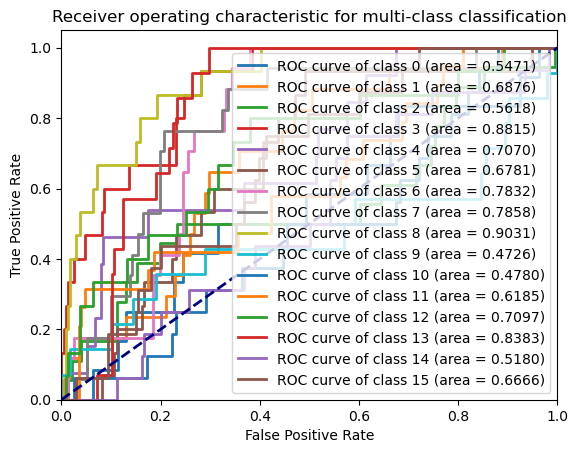

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 30 Epoch

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=30, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/30
43/43 [==============================] - 120s 2s/step - loss: 2.8027 - accuracy: 0.0570 - val_loss: 2.7689 - val_accuracy: 0.0723
Epoch 2/30
43/43 [==============================] - 59s 1s/step - loss: 2.7705 - accuracy: 0.0651 - val_loss: 2.7668 - val_accuracy: 0.0964
Epoch 3/30
43/43 [==============================] - 58s 1s/step - loss: 2.7631 - accuracy: 0.0748 - val_loss: 2.7640 - val_accuracy: 0.0683
Epoch 4/30
43/43 [==============================] - 62s 1s/step - loss: 2.7616 - accuracy: 0.0918 - val_loss: 2.7679 - val_accuracy: 0.0723
Epoch 5/30
43/43 [==============================] - 75s 2s/step - loss: 2.7558 - accuracy: 0.0903 - val_loss: 2.7636 - val_accuracy: 0.0763
Epoch 6/30
43/43 [==============================] - 81s 2s/step - loss: 2.7476 - accuracy: 0.0807 - val_loss: 2.7668 - val_accuracy: 0.0683
Epoch 7/30
43/43 [==============================] - 65s 2s/step - loss: 2.7425 - accuracy: 0.0925 - val_loss: 2.7599 - val_accuracy: 0.0843
Epoch 8/30
43/43 [=

In [51]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

8/8 [==============================] - 8s 653ms/step - loss: 2.4406 - accuracy: 0.1526
Test Loss: 2.4405696392059326
Test Accuracy: 0.1526104360818863
8/8 [==============================] - 22s 623ms/step


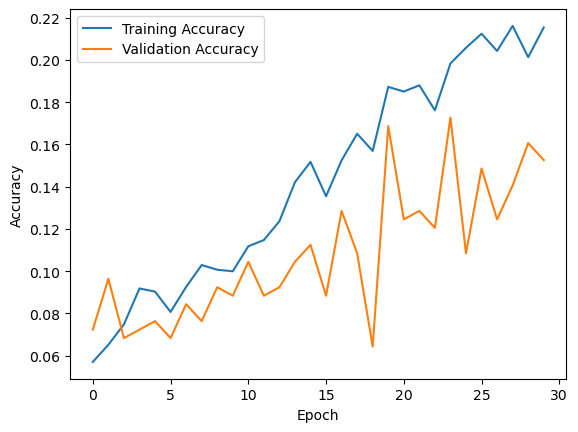

In [52]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

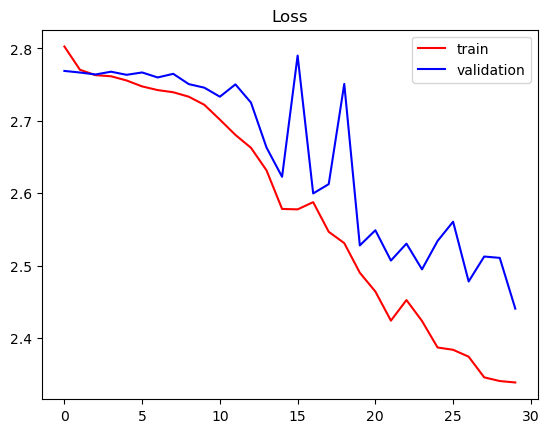

In [53]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [54]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

8/8 [==============================] - 8s 667ms/step
Confusion Matrix:
[[ 0  1  7  1  0  0  1  0  1  0  1  0  0  0  0  0]
 [ 0  8  3  1  0  0  1  1  0  0  3  0  0  0  0  0]
 [ 0  2  6  2  1  0  2  0  0  1  3  0  0  0  0  1]
 [ 0  1  0  9  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  3  5  0  0  0  4  0  1  0  0  0  0  0  0  0]
 [ 0  3  3  3  0  0  1  5  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  2  0  8  0  1  0  0  0  0  1]
 [ 0  2  2  8  0  0  1  4  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  4  0  8  0  1  0  0  0  1  0]
 [ 0  5  6  0  0  0  1  0  0  0  2  0  0  0  0  0]
 [ 0  6  5  1  1  0  0  0  0  2  1  0  0  0  0  0]
 [ 0  7  6  1  0  1  1  1  0  1  1  0  0  0  0  0]
 [ 0  5  4  0  0  0  2  0  3  0  1  0  0  0  0  0]
 [ 0  0  1 11  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  4  8  0  0  0  1  0  1  1  0  0  0  0  0  1]
 [ 0  2  9  0  0  0  0  0  3  0  2  0  0  0  0  0]]


8/8 [==============================] - 8s 760ms/step


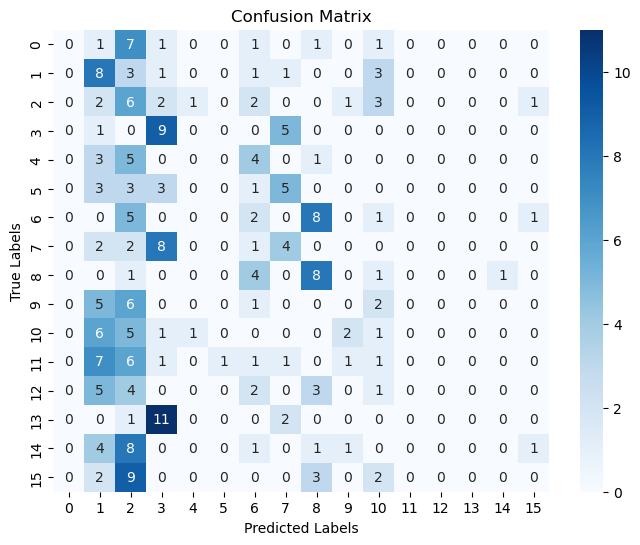

In [55]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [56]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.4706, FPR = 0.1767, TNR = 0.8233, FNR = 0.5294
Class 2: TPR = 0.3333, FPR = 0.2814, TNR = 0.7186, FNR = 0.6667
Class 3: TPR = 0.6000, FPR = 0.1197, TNR = 0.8803, FNR = 0.4000
Class 4: TPR = 0.0000, FPR = 0.0085, TNR = 0.9915, FNR = 1.0000
Class 5: TPR = 0.0000, FPR = 0.0043, TNR = 0.9957, FNR = 1.0000
Class 6: TPR = 0.1176, FPR = 0.0819, TNR = 0.9181, FNR = 0.8824
Class 7: TPR = 0.2353, FPR = 0.0603, TNR = 0.9397, FNR = 0.7647
Class 8: TPR = 0.5333, FPR = 0.0726, TNR = 0.9274, FNR = 0.4667
Class 9: TPR = 0.0000, FPR = 0.0213, TNR = 0.9787, FNR = 1.0000
Class 10: TPR = 0.0625, FPR = 0.0644, TNR = 0.9356, FNR = 0.9375
Class 11: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 12: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0000, FPR = 0.0043, TNR = 0.9957, FNR = 1.0000
Class 15: TPR = 0.0000, FPR = 0.012

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17864\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17864\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


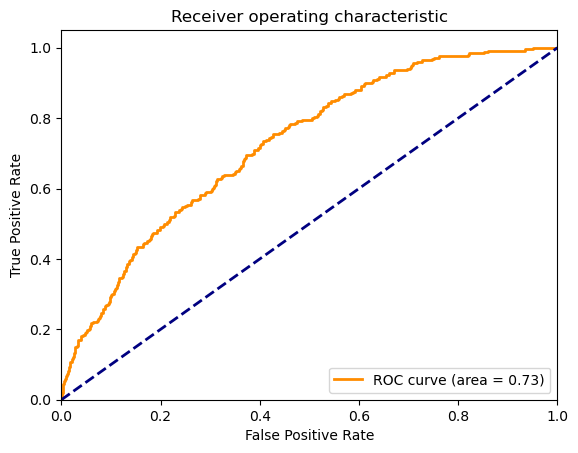

In [57]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

8/8 [==============================] - 7s 523ms/step - loss: 2.4406 - accuracy: 0.1526
Test Loss: 2.4405696392059326
Test Accuracy: 0.1526104360818863
8/8 [==============================] - 7s 609ms/step
AUC for class 0: 0.4378
AUC for class 1: 0.7074
AUC for class 2: 0.5127
AUC for class 3: 0.9285
AUC for class 4: 0.7037
AUC for class 5: 0.7128
AUC for class 6: 0.8344
AUC for class 7: 0.8261
AUC for class 8: 0.9148
AUC for class 9: 0.6131
AUC for class 10: 0.5982
AUC for class 11: 0.6265
AUC for class 12: 0.6493
AUC for class 13: 0.8921
AUC for class 14: 0.4759
AUC for class 15: 0.5861


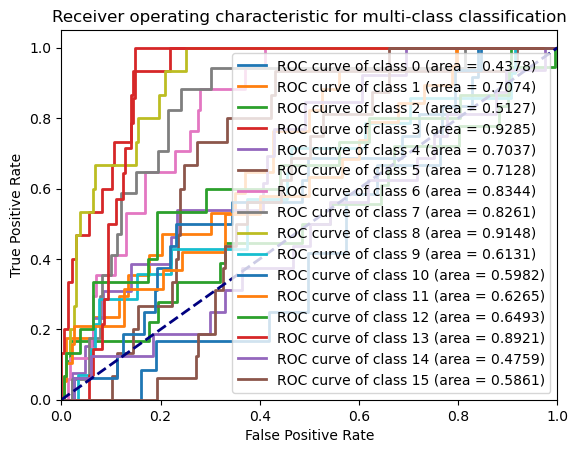

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 35 Epoch

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=35, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/35
43/43 [==============================] - 164s 2s/step - loss: 2.7973 - accuracy: 0.0622 - val_loss: 2.7643 - val_accuracy: 0.0803
Epoch 2/35
43/43 [==============================] - 73s 2s/step - loss: 2.7740 - accuracy: 0.0748 - val_loss: 2.7715 - val_accuracy: 0.0763
Epoch 3/35
43/43 [==============================] - 85s 2s/step - loss: 2.7622 - accuracy: 0.0866 - val_loss: 2.7656 - val_accuracy: 0.0683
Epoch 4/35
43/43 [==============================] - 77s 2s/step - loss: 2.7622 - accuracy: 0.0785 - val_loss: 2.7605 - val_accuracy: 0.1044
Epoch 5/35
43/43 [==============================] - 75s 2s/step - loss: 2.7585 - accuracy: 0.0792 - val_loss: 2.7702 - val_accuracy: 0.0683
Epoch 6/35
43/43 [==============================] - 67s 2s/step - loss: 2.7506 - accuracy: 0.0814 - val_loss: 2.7600 - val_accuracy: 0.0803
Epoch 7/35
43/43 [==============================] - 68s 2s/step - loss: 2.7430 - accuracy: 0.0918 - val_loss: 2.7544 - val_accuracy: 0.0803
Epoch 8/35
43/43 [=

In [60]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

8/8 [==============================] - 7s 627ms/step - loss: 2.4116 - accuracy: 0.1727
Test Loss: 2.411591053009033
Test Accuracy: 0.1726907640695572
8/8 [==============================] - 43s 547ms/step


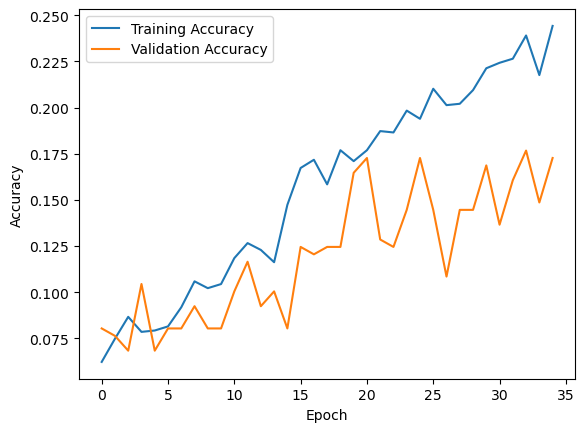

In [61]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

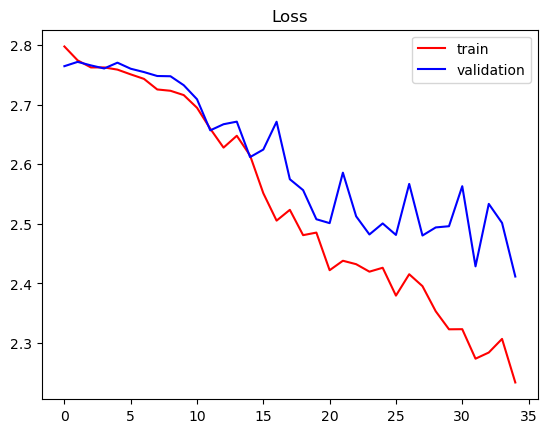

In [62]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [63]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

8/8 [==============================] - 10s 723ms/step
Confusion Matrix:
[[ 0  2  2  0  1  0  0  1  0  0  0  0  0  0  1  5]
 [ 0  9  1  2  0  0  0  2  0  0  1  0  0  0  1  1]
 [ 0  4  5  1  2  0  1  0  0  0  0  1  0  0  1  3]
 [ 0  2  0  9  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 1  2  2  0  2  0  1  1  1  0  0  0  0  0  0  3]
 [ 0  7  1  2  0  0  0  3  0  0  0  0  0  1  0  1]
 [ 0  0  0  0  0  0  6  0  3  0  0  0  0  0  0  8]
 [ 0  2  1 10  0  0  0  2  0  0  0  0  0  1  0  1]
 [ 0  0  1  0  0  0  4  0  6  0  0  0  0  0  3  1]
 [ 0  3  6  0  0  0  0  1  0  0  2  0  0  0  1  1]
 [ 0  6  5  1  1  0  1  1  0  0  0  0  0  0  0  1]
 [ 0  7  3  1  1  0  0  3  0  0  0  1  0  1  0  2]
 [ 0  4  3  0  1  0  0  0  1  0  1  0  2  0  0  3]
 [ 0  1  1 10  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  4  2  1  0  0  1  1  0  0  0  1  0  0  0  6]
 [ 0  3  7  0  1  0  0  0  3  0  0  1  0  0  0  1]]


8/8 [==============================] - 6s 557ms/step


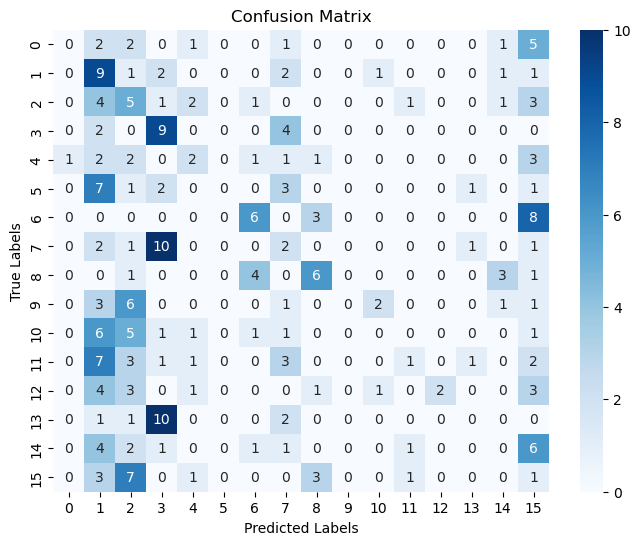

In [64]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [65]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0042, TNR = 0.9958, FNR = 1.0000
Class 1: TPR = 0.5294, FPR = 0.2026, TNR = 0.7974, FNR = 0.4706
Class 2: TPR = 0.2778, FPR = 0.1515, TNR = 0.8485, FNR = 0.7222
Class 3: TPR = 0.6000, FPR = 0.1197, TNR = 0.8803, FNR = 0.4000
Class 4: TPR = 0.1538, FPR = 0.0297, TNR = 0.9703, FNR = 0.8462
Class 5: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 6: TPR = 0.3529, FPR = 0.0345, TNR = 0.9655, FNR = 0.6471
Class 7: TPR = 0.1176, FPR = 0.0819, TNR = 0.9181, FNR = 0.8824
Class 8: TPR = 0.4000, FPR = 0.0342, TNR = 0.9658, FNR = 0.6000
Class 9: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 10: TPR = 0.0000, FPR = 0.0172, TNR = 0.9828, FNR = 1.0000
Class 11: TPR = 0.0526, FPR = 0.0130, TNR = 0.9870, FNR = 0.9474
Class 12: TPR = 0.1333, FPR = 0.0000, TNR = 1.0000, FNR = 0.8667
Class 13: TPR = 0.0000, FPR = 0.0128, TNR = 0.9872, FNR = 1.0000
Class 14: TPR = 0.0000, FPR = 0.0300, TNR = 0.9700, FNR = 1.0000
Class 15: TPR = 0.0625, FPR = 0.154

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17864\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17864\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


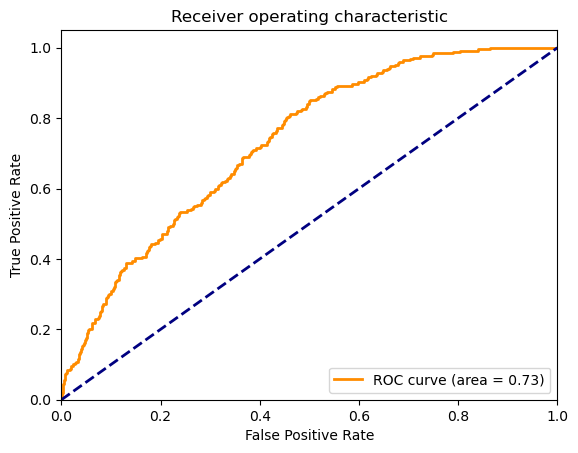

In [66]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

8/8 [==============================] - 5s 483ms/step - loss: 2.4116 - accuracy: 0.1727
Test Loss: 2.411591053009033
Test Accuracy: 0.1726907640695572
8/8 [==============================] - 5s 468ms/step
AUC for class 0: 0.4402
AUC for class 1: 0.6902
AUC for class 2: 0.5976
AUC for class 3: 0.9048
AUC for class 4: 0.6806
AUC for class 5: 0.6966
AUC for class 6: 0.8593
AUC for class 7: 0.8327
AUC for class 8: 0.8969
AUC for class 9: 0.5274
AUC for class 10: 0.6038
AUC for class 11: 0.6993
AUC for class 12: 0.6852
AUC for class 13: 0.8772
AUC for class 14: 0.5861
AUC for class 15: 0.6510


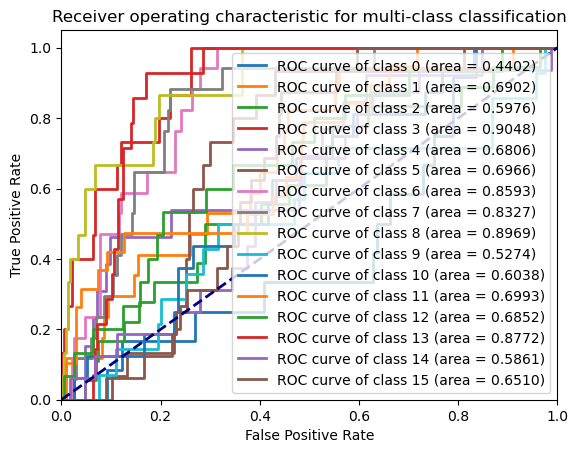

In [67]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 40 Epoch

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=40, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/40
43/43 [==============================] - 239s 2s/step - loss: 2.8137 - accuracy: 0.0718 - val_loss: 2.7742 - val_accuracy: 0.0803
Epoch 2/40
43/43 [==============================] - 60s 1s/step - loss: 2.7697 - accuracy: 0.0822 - val_loss: 2.7649 - val_accuracy: 0.0803
Epoch 3/40
43/43 [==============================] - 53s 1s/step - loss: 2.7666 - accuracy: 0.0762 - val_loss: 2.7653 - val_accuracy: 0.0723
Epoch 4/40
43/43 [==============================] - 54s 1s/step - loss: 2.7539 - accuracy: 0.0873 - val_loss: 2.7647 - val_accuracy: 0.0643
Epoch 5/40
43/43 [==============================] - 58s 1s/step - loss: 2.7471 - accuracy: 0.0984 - val_loss: 2.7816 - val_accuracy: 0.0683
Epoch 6/40
43/43 [==============================] - 58s 1s/step - loss: 2.7453 - accuracy: 0.0992 - val_loss: 2.7606 - val_accuracy: 0.0924
Epoch 7/40
43/43 [==============================] - 68s 2s/step - loss: 2.7297 - accuracy: 0.1029 - val_loss: 2.7571 - val_accuracy: 0.1044
Epoch 8/40
43/43 [=

In [69]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

8/8 [==============================] - 6s 513ms/step - loss: 2.4220 - accuracy: 0.1767
Test Loss: 2.4219651222229004
Test Accuracy: 0.17670682072639465
8/8 [==============================] - 17s 497ms/step


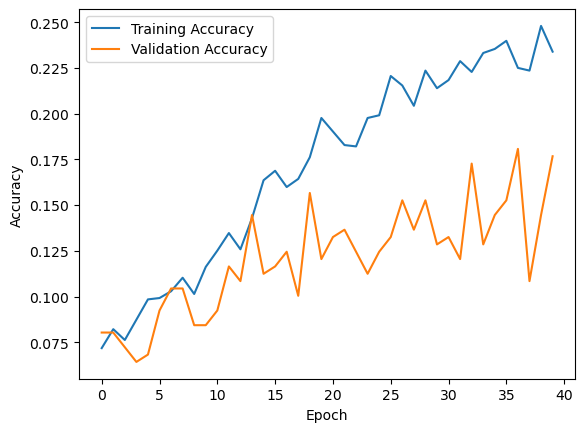

In [70]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

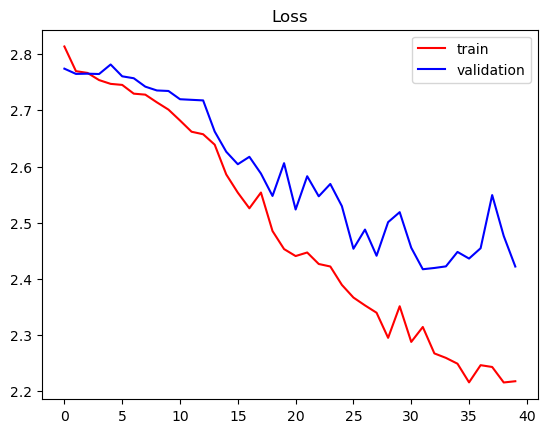

In [71]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [72]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

8/8 [==============================] - 4s 406ms/step
Confusion Matrix:
[[ 0  2  3  0  0  0  0  0  6  0  1  0  0  0  0  0]
 [ 0  8  1  1  1  0  0  0  2  0  3  0  0  1  0  0]
 [ 0  4  4  1  0  0  1  0  5  0  2  0  1  0  0  0]
 [ 0  1  0  8  0  0  0  4  0  0  0  0  0  2  0  0]
 [ 0  1  2  0  0  0  0  0  7  1  0  0  2  0  0  0]
 [ 0  5  3  1  0  1  0  2  1  0  1  0  1  0  0  0]
 [ 0  0  0  0  1  0  0  0 14  0  0  0  2  0  0  0]
 [ 0  4  2  7  0  0  0  2  1  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  2  0 13  0  0  0  0  0  0  0]
 [ 0  4  5  0  0  0  1  0  1  0  2  0  1  0  0  0]
 [ 0  1  2  1  0  0  0  0  2  1  5  0  2  0  1  1]
 [ 0  4  1  1  1  1  0  4  3  0  3  1  0  0  0  0]
 [ 0  0  2  0  1  0  0  0  9  0  1  0  2  0  0  0]
 [ 0  1  0 10  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  2  3  0  0  0  1  1  6  0  2  0  1  0  0  0]
 [ 0  1  3  0  0  0  0  0  5  0  2  1  3  0  1  0]]


8/8 [==============================] - 5s 505ms/step


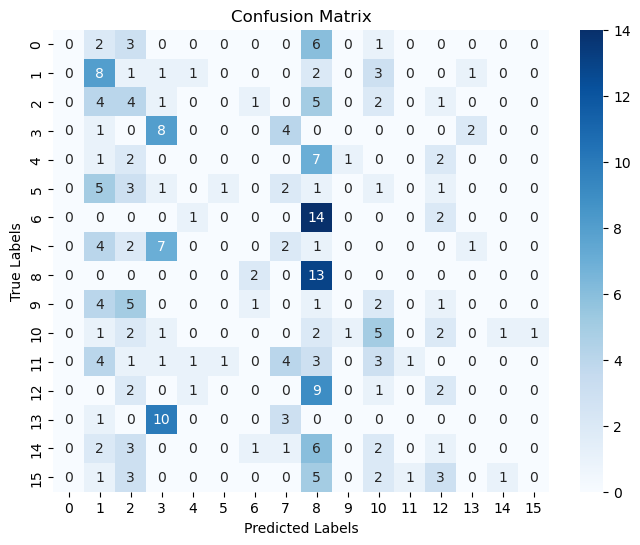

In [73]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [74]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.4706, FPR = 0.1293, TNR = 0.8707, FNR = 0.5294
Class 2: TPR = 0.2222, FPR = 0.1169, TNR = 0.8831, FNR = 0.7778
Class 3: TPR = 0.5333, FPR = 0.0940, TNR = 0.9060, FNR = 0.4667
Class 4: TPR = 0.0000, FPR = 0.0169, TNR = 0.9831, FNR = 1.0000
Class 5: TPR = 0.0667, FPR = 0.0043, TNR = 0.9957, FNR = 0.9333
Class 6: TPR = 0.0000, FPR = 0.0216, TNR = 0.9784, FNR = 1.0000
Class 7: TPR = 0.1176, FPR = 0.0603, TNR = 0.9397, FNR = 0.8824
Class 8: TPR = 0.8667, FPR = 0.2650, TNR = 0.7350, FNR = 0.1333
Class 9: TPR = 0.0000, FPR = 0.0085, TNR = 0.9915, FNR = 1.0000
Class 10: TPR = 0.3125, FPR = 0.0730, TNR = 0.9270, FNR = 0.6875
Class 11: TPR = 0.0526, FPR = 0.0043, TNR = 0.9957, FNR = 0.9474
Class 12: TPR = 0.1333, FPR = 0.0556, TNR = 0.9444, FNR = 0.8667
Class 13: TPR = 0.0000, FPR = 0.0170, TNR = 0.9830, FNR = 1.0000
Class 14: TPR = 0.0000, FPR = 0.0086, TNR = 0.9914, FNR = 1.0000
Class 15: TPR = 0.0000, FPR = 0.004

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17864\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17864\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


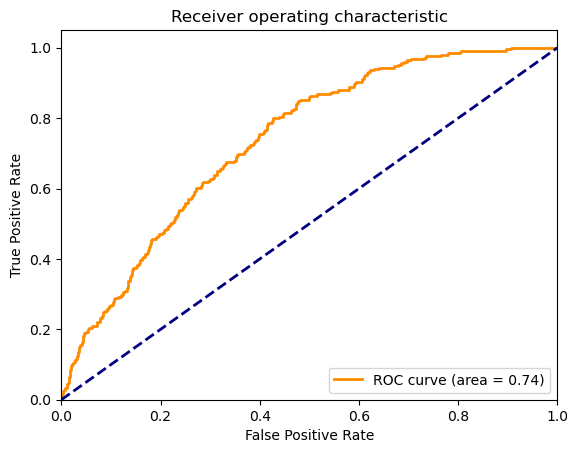

In [75]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

8/8 [==============================] - 4s 408ms/step - loss: 2.4220 - accuracy: 0.1767
Test Loss: 2.4219651222229004
Test Accuracy: 0.17670682072639465
8/8 [==============================] - 4s 395ms/step
AUC for class 0: 0.4427
AUC for class 1: 0.7652
AUC for class 2: 0.5712
AUC for class 3: 0.9222
AUC for class 4: 0.7233
AUC for class 5: 0.6843
AUC for class 6: 0.8352
AUC for class 7: 0.8152
AUC for class 8: 0.8687
AUC for class 9: 0.5210
AUC for class 10: 0.5982
AUC for class 11: 0.6153
AUC for class 12: 0.7510
AUC for class 13: 0.8954
AUC for class 14: 0.6052
AUC for class 15: 0.6693


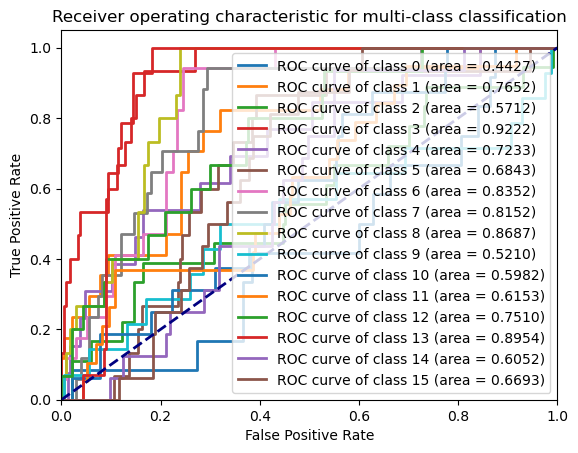

In [76]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 80 Epoch

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=80, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/80
43/43 [==============================] - 106s 2s/step - loss: 2.7949 - accuracy: 0.0688 - val_loss: 2.7843 - val_accuracy: 0.0442
Epoch 2/80
43/43 [==============================] - 64s 1s/step - loss: 2.7688 - accuracy: 0.0873 - val_loss: 2.7679 - val_accuracy: 0.0723
Epoch 3/80
43/43 [==============================] - 58s 1s/step - loss: 2.7540 - accuracy: 0.0777 - val_loss: 2.7666 - val_accuracy: 0.0843
Epoch 4/80
43/43 [==============================] - 64s 2s/step - loss: 2.7551 - accuracy: 0.0873 - val_loss: 2.7712 - val_accuracy: 0.0683
Epoch 5/80
43/43 [==============================] - 66s 2s/step - loss: 2.7487 - accuracy: 0.0970 - val_loss: 2.7635 - val_accuracy: 0.0763
Epoch 6/80
43/43 [==============================] - 63s 1s/step - loss: 2.7421 - accuracy: 0.0859 - val_loss: 2.7526 - val_accuracy: 0.0803
Epoch 7/80
43/43 [==============================] - 58s 1s/step - loss: 2.7262 - accuracy: 0.0999 - val_loss: 2.7527 - val_accuracy: 0.0803
Epoch 8/80
43/43 [=

In [78]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

8/8 [==============================] - 6s 567ms/step - loss: 2.4887 - accuracy: 0.1727
Test Loss: 2.488693952560425
Test Accuracy: 0.1726907640695572
8/8 [==============================] - 18s 589ms/step


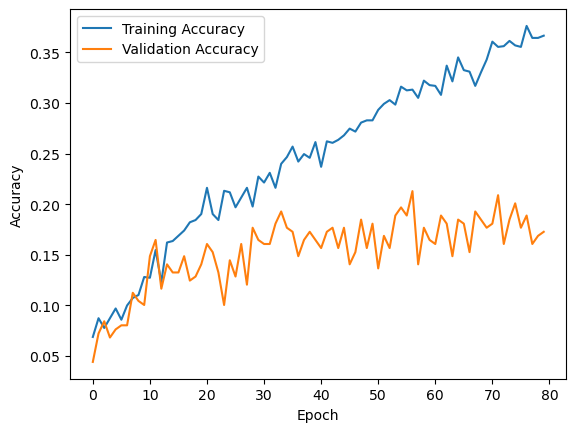

In [79]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

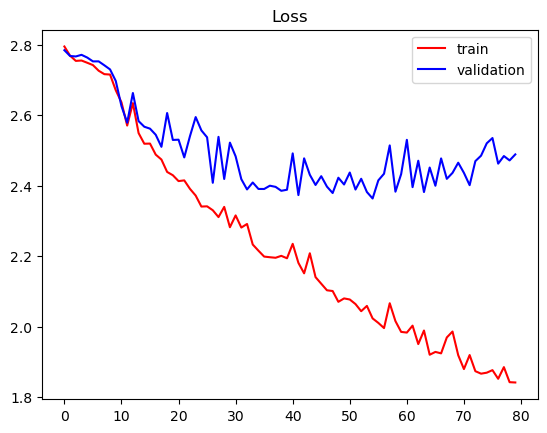

In [80]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [81]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

8/8 [==============================] - 7s 577ms/step
Confusion Matrix:
[[0 0 3 0 0 0 1 0 1 1 0 0 0 0 2 4]
 [0 2 1 3 0 0 0 1 0 1 2 3 0 0 2 2]
 [1 0 3 1 0 0 1 0 1 1 1 3 1 0 1 4]
 [0 0 1 7 0 0 0 6 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 2 3 0 1 1 0 0 2 0 1 2]
 [0 1 4 2 0 1 0 3 0 0 0 1 1 0 0 2]
 [0 0 1 0 0 0 4 0 4 0 0 0 3 0 1 4]
 [0 0 1 5 0 1 0 6 0 0 0 2 0 0 1 1]
 [0 0 0 0 2 0 4 0 6 1 0 0 0 0 1 1]
 [0 1 5 0 1 1 0 1 0 0 1 1 0 0 3 0]
 [0 0 3 1 1 1 1 0 0 1 1 1 1 0 2 3]
 [0 0 3 2 0 0 0 3 0 0 1 3 1 0 5 1]
 [0 0 1 0 2 0 0 0 1 0 0 0 5 0 3 3]
 [0 0 1 9 0 2 0 2 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 1 0 0 1 0 3 0 3 5]
 [0 0 3 0 0 0 1 0 2 0 0 0 1 0 7 2]]


8/8 [==============================] - 6s 526ms/step


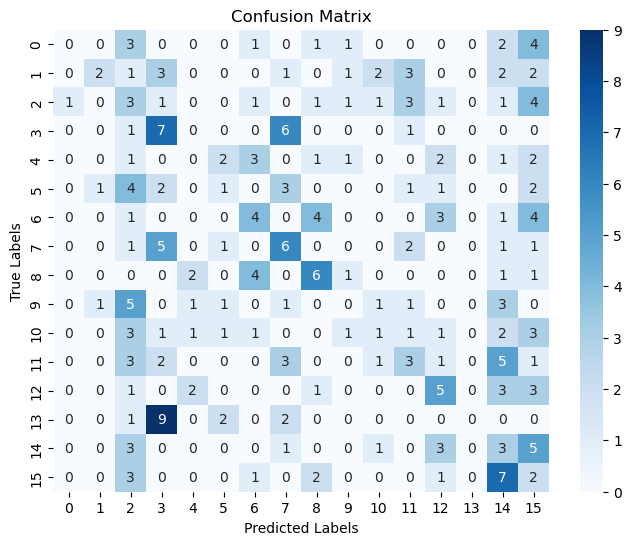

In [82]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [83]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0042, TNR = 0.9958, FNR = 1.0000
Class 1: TPR = 0.1176, FPR = 0.0086, TNR = 0.9914, FNR = 0.8824
Class 2: TPR = 0.1667, FPR = 0.1342, TNR = 0.8658, FNR = 0.8333
Class 3: TPR = 0.4667, FPR = 0.0983, TNR = 0.9017, FNR = 0.5333
Class 4: TPR = 0.0000, FPR = 0.0254, TNR = 0.9746, FNR = 1.0000
Class 5: TPR = 0.0667, FPR = 0.0299, TNR = 0.9701, FNR = 0.9333
Class 6: TPR = 0.2353, FPR = 0.0474, TNR = 0.9526, FNR = 0.7647
Class 7: TPR = 0.3529, FPR = 0.0733, TNR = 0.9267, FNR = 0.6471
Class 8: TPR = 0.4000, FPR = 0.0427, TNR = 0.9573, FNR = 0.6000
Class 9: TPR = 0.0000, FPR = 0.0255, TNR = 0.9745, FNR = 1.0000
Class 10: TPR = 0.0625, FPR = 0.0258, TNR = 0.9742, FNR = 0.9375
Class 11: TPR = 0.1579, FPR = 0.0522, TNR = 0.9478, FNR = 0.8421
Class 12: TPR = 0.3333, FPR = 0.0556, TNR = 0.9444, FNR = 0.6667
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.1875, FPR = 0.1245, TNR = 0.8755, FNR = 0.8125
Class 15: TPR = 0.1250, FPR = 0.137

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17864\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17864\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


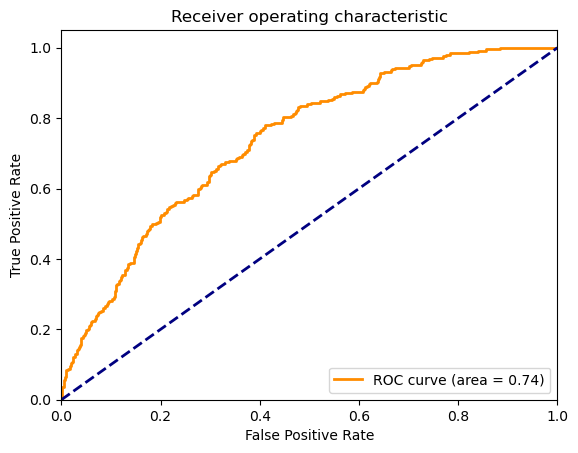

In [84]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

8/8 [==============================] - 7s 609ms/step - loss: 2.4887 - accuracy: 0.1727
Test Loss: 2.488693952560425
Test Accuracy: 0.1726907640695572
8/8 [==============================] - 7s 585ms/step
AUC for class 0: 0.4096
AUC for class 1: 0.7609
AUC for class 2: 0.6176
AUC for class 3: 0.8866
AUC for class 4: 0.6747
AUC for class 5: 0.7182
AUC for class 6: 0.8509
AUC for class 7: 0.8278
AUC for class 8: 0.8892
AUC for class 9: 0.5818
AUC for class 10: 0.6347
AUC for class 11: 0.6652
AUC for class 12: 0.8046
AUC for class 13: 0.8884
AUC for class 14: 0.6398
AUC for class 15: 0.6950


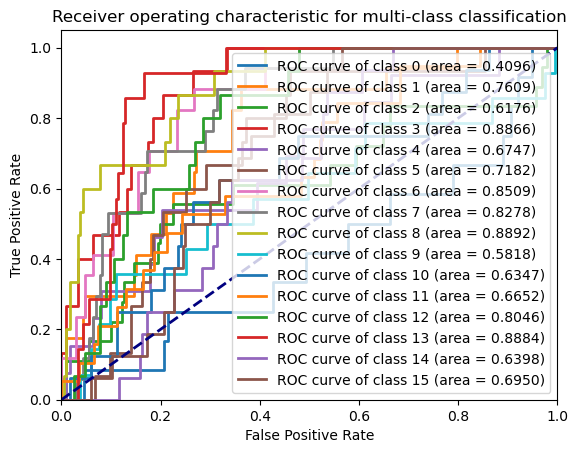

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()